In [23]:
import os 
import cv2 as cv
import numpy as np

In [24]:
people = ['Brad Pitt','Burak Ozcevik','Jason Statham','Megan Fox','Scarlett Johansson']

In [25]:
p = []

for i in os.listdir(r'C:\Users\tufan\images'):
    p.append(i)
p

['Brad Pitt',
 'Burak Ozcevik',
 'Jason Statham',
 'Megan Fox',
 'Scarlett Johansson']

In [4]:
DIR = r'C:\Users\tufan\images'
features = []
labels = []

In [5]:
haar_cascade = cv.CascadeClassifier("frontelFaceCascada.xml")

In [6]:
def create_train():
    for person in people:
        path = os.path.join(DIR,person)
        label = people.index(person)
        
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            img_array = cv.imread(img_path)
            gray = cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)
            
            face_rect = haar_cascade.detectMultiScale(gray,1.1,10)
            
            for (x,y,w,h) in face_rect:
                faces_roi = gray[y:y+h,x:x+w]
                features.append(faces_roi)
                labels.append(label)

In [7]:
create_train()

In [8]:
features = np.array(features,dtype = 'object')
labels = np.array(labels)
face_recognizer = cv.face.LBPHFaceRecognizer_create()

In [9]:
face_recognizer.train(features,labels)

In [10]:
face_recognizer.save('face_trained.yml')
np.save('features.npy',features)
np.save('labels.npy',labels)

Eğitilen verileri test etme zamanı

In [11]:
len(labels)

42

In [26]:
#features = np.load('features.npy')
#labels = np.load('labels.npy')
face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('face_trained.yml')

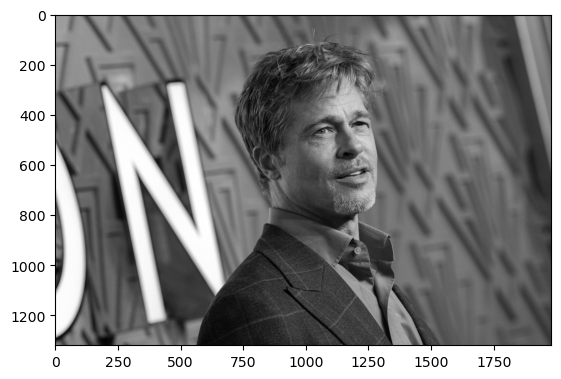

In [51]:
import matplotlib.pyplot as plt
img = cv.imread(r"C:\Users\tufan\Val\bratt.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray,"gray")

In [52]:
face_rect = haar_cascade.detectMultiScale(gray,1.1,7.5)
for (x,y,w,h) in face_rect:
    face_roi = gray[y:y+h,x:x+w]
    label , confidence = face_recognizer.predict(face_roi)
    
    cv.putText(img,str(people[label]),(40,40),cv.FONT_HERSHEY_COMPLEX,1.0,(0,0,255),4)
    
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'detectMultiScale'
> Overload resolution failed:
>  - Argument 'minNeighbors' is required to be an integer
>  - Argument 'minNeighbors' is required to be an integer


Label = Brad Pitt with a confidence of  71.61181281675849


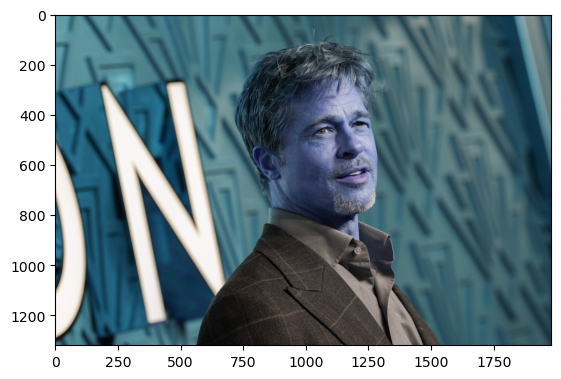

In [50]:
print(f'Label = {people[label]} with a confidence of  {confidence}')
plt.imshow(img)